Note:

There was no difference between finding rates from individual DTDs and combining then compared to combining all DTDs and doing one rate calculation   

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

SFH = data["SFH"]

In [3]:
DTD = data["DTD"]

event_types = ["Ia", "IIP", "II", "Ib", "Ic", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]
metallicities = ["z001", "z002", "z003", "z004", "z006", "z008", "z010", "z014", "z020", "z030", "z040", "zem4", "zem5" ]


event_total = {}
for i in (metallicities):
    event_total[i] = {}
    for j in event_types:
        event_total[i][j] = DTD[j][i][:]
    event_total[i]["CCSN"] = event_total[i]["II"] + event_total[i]["Ib"] + event_total[i]["Ic"] + event_total[i]["IIP"]



In [4]:
bin_centres = data['DTD'].attrs['bin_centres']

In [5]:
Z0 = metallicities[0] 
Z1 = metallicities[1] 
Z2 = metallicities[2] 
Z3 = metallicities[3] 
Z4 = metallicities[4] 
Z5 = metallicities[5] 
Z6 = metallicities[6] 
Z7 = metallicities[7] 
Z8 = metallicities[8] 
Z9 = metallicities[9] 
Z10 = metallicities[10] 
Z11 = metallicities[11] 
Z12 = metallicities[12] 


x0 = event_total[Z0]
x1 = event_total[Z1]
x2 = event_total[Z2]
x3 = event_total[Z3]
x4 = event_total[Z4]
x5 = event_total[Z5]
x6 = event_total[Z6]
x7 = event_total[Z7]
x8 = event_total[Z8]
x9 = event_total[Z9]
x10 = event_total[Z10]
x11 = event_total[Z11]
x12 = event_total[Z12]




DTD_Ia = np.array(x0["Ia"] + x1["Ia"] + + x2["Ia"] + x3["Ia"] + x4["Ia"] + x5["Ia"] + x6["Ia"] + x7["Ia"] + x8["Ia"] + x9["Ia"] + x10["Ia"] + x11["Ia"] + x12["Ia"]) 

##### SFH

In [22]:
z = np.linspace(0, 20, 50000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

In [23]:
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

In [24]:
@np.vectorize
def lookback(z, omega1, omega2, hubble):
    
    def f(x):
        a = np.sqrt(omega1*(1+x)**3 + omega2)
        return 1/((1+x)*a)
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *spi.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

Text(0.5, 0, 'Lookback Time (Gyr)')

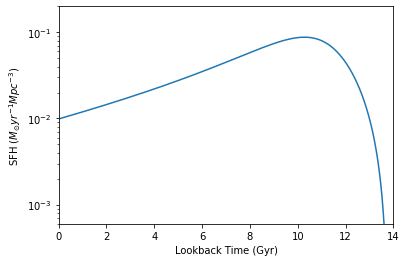

In [25]:
plt.plot(lookback(z, omega_M, omega_L, h), trans_M_D)
plt.xlim(0, 14)
plt.ylim(6e-4,2e-1)
plt.yscale('log')
plt.ylabel('SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Lookback Time (Gyr)')

In [27]:
#Converting the SFH to Gpc^-3
trans_M_D = trans_M_D * 1e9

In [73]:
num_bins = 100


bin_lookback_times = np.linspace(13.6, 0, num_bins + 1)

integrated_SFH = np.zeros(num_bins)


for i in range(num_bins):

    bin_mask = np.logical_and(lookback(z, omega_M, omega_L, h) <= bin_lookback_times[i], lookback(z, omega_M, omega_L, h) > bin_lookback_times[i + 1])
    bin_M_D = trans_M_D[bin_mask][::-1] 
    integrated_SFH[i] = spi.simps(bin_M_D, z[bin_mask][::-1])  


integrated_SFH = np.abs(integrated_SFH)

In [92]:
integrated_SFH

array([ 6579573.94228341,  7371021.8393898 ,  7975448.56900624,
        8471996.5149591 ,  8889255.47895562,  9249428.23899297,
        9546766.45902507,  9803155.58618096,  9998254.81462982,
       10157959.09849234, 10240121.39576748, 10305152.56755904,
       10260540.77205908, 10212608.92772089, 10080041.58512002,
        9906584.27399895,  9656389.63182512,  9362064.89729778,
        9027226.05543444,  8681978.42495095,  8287380.86659379,
        7897846.20419978,  7464646.20017281,  7038405.00498686,
        6598975.67396753,  6193724.22646215,  5797431.77804727,
        5383942.62572423,  5028540.20899578,  4700497.05375641,
        4338397.72065519,  4012308.99488698,  3753164.76075   ,
        3468591.35043992,  3221428.1299722 ,  2982171.1621048 ,
        2752093.33125025,  2583973.92762207,  2371261.028528  ,
        2218145.93012933,  2071399.4882231 ,  1908657.48846032,
        1776783.66094293,  1672658.29488939,  1552634.18900806,
        1439190.90527438,  1351130.80720

In [75]:
bin_size_gyrs = np.abs(np.diff(bin_lookback_times))
bin_size_gyrs = bin_size_gyrs[0]
bin_size_gyrs = round(bin_size_gyrs, 2)

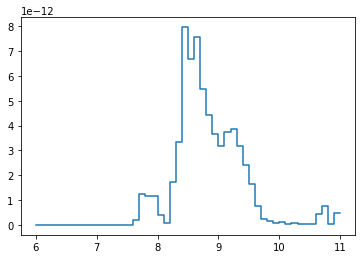

In [76]:
plt.step(bin_centres, DTD_Ia)

In [77]:
linear_bin_centres = 10**bin_centres
linear_bin_centres_gyrs = linear_bin_centres / 1e9

In [78]:
mask = (linear_bin_centres_gyrs >= 0) & (linear_bin_centres_gyrs <= 13.6)


filtered_linear_bin_centres_gyrs = linear_bin_centres_gyrs[mask]
filtered_DTD_Ia = DTD_Ia[mask]

In [93]:
bin_edges = np.arange(0, 13.6+4*bin_size_gyrs, bin_size_gyrs)


digitized = np.digitize(filtered_linear_bin_centres_gyrs, bin_edges)


integrated_DTD_Ia = np.zeros(len(bin_edges) - 1)


for i in range(1, len(bin_edges)):
    bin_mask = (digitized == i)
    
    if np.any(bin_mask):  
        integrated_DTD_Ia[i - 1] = spi.simps(filtered_DTD_Ia[bin_mask], filtered_linear_bin_centres_gyrs[bin_mask])



In [94]:
#integrated_DTD_Ia

array([7.65972441e-14, 1.72540743e-13, 5.99807426e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [95]:
rates = np.zeros(num_bins)

for i in range(num_bins):
    rate = 0.0  
    for j in range(i + 1):
        
        rate += integrated_SFH[i] * integrated_DTD_Ia[i - j]
    rates[i] = rate / bin_size_gyrs 

In [96]:
bin_centers_linear = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_centers_linear = bin_centers_linear[:-1]

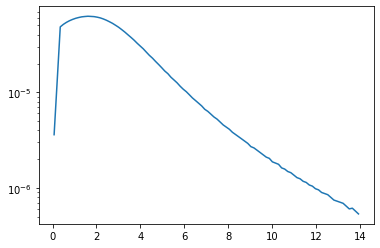

In [105]:
plt.plot(bin_centers_linear, rates)
plt.yscale('log')


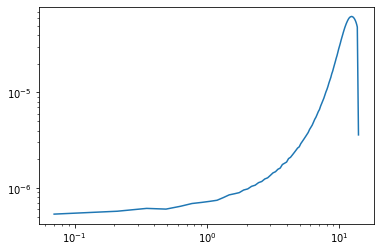

In [110]:
plt.plot(bin_centers_linear, rates[::-1])
plt.yscale('log')
plt.xscale('log')


<ipython-input-114-3e1cebf312a5>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 14)


(0.053722397531872516, 14)

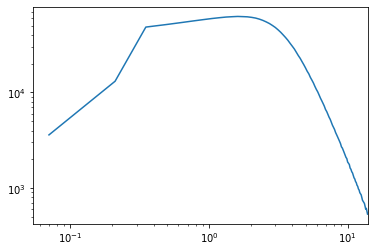

In [114]:
plt.plot(bin_centers_linear, rates*1e9)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0, 14)